      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

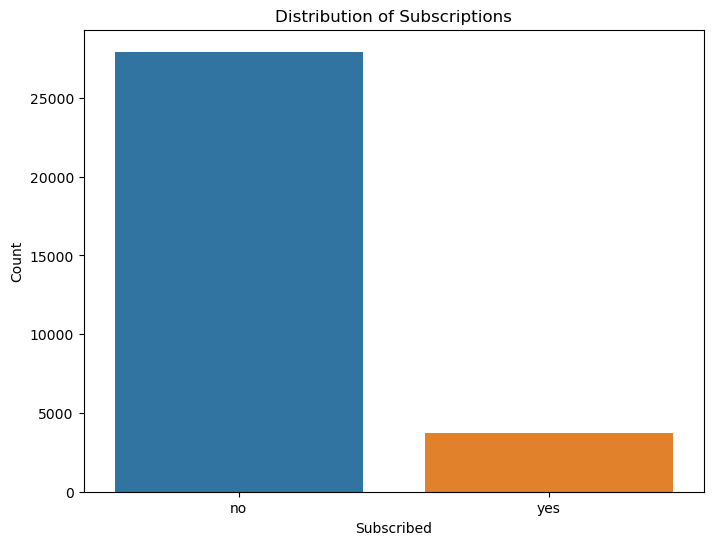

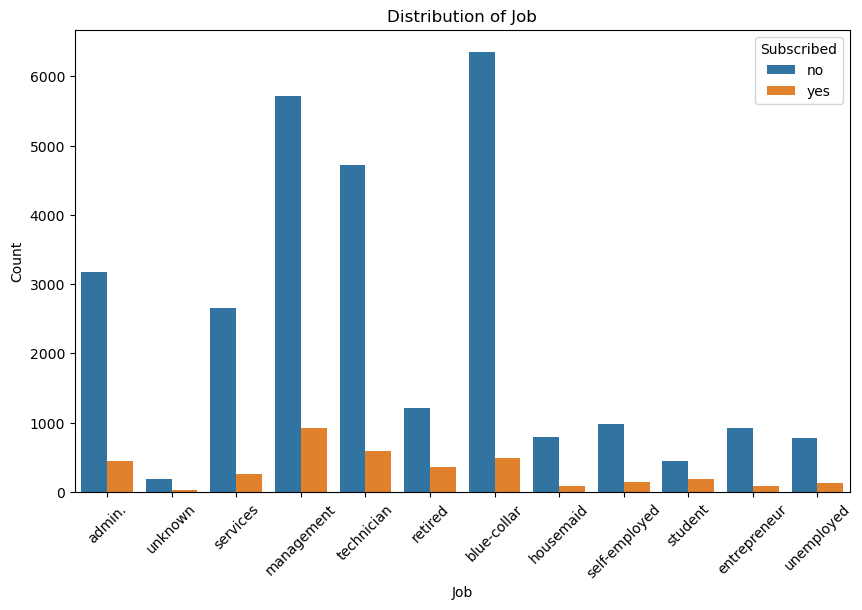

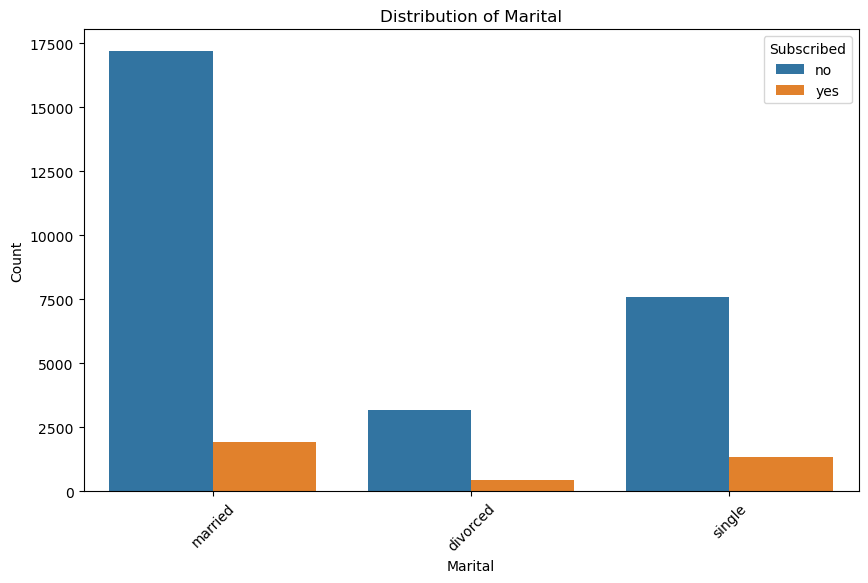

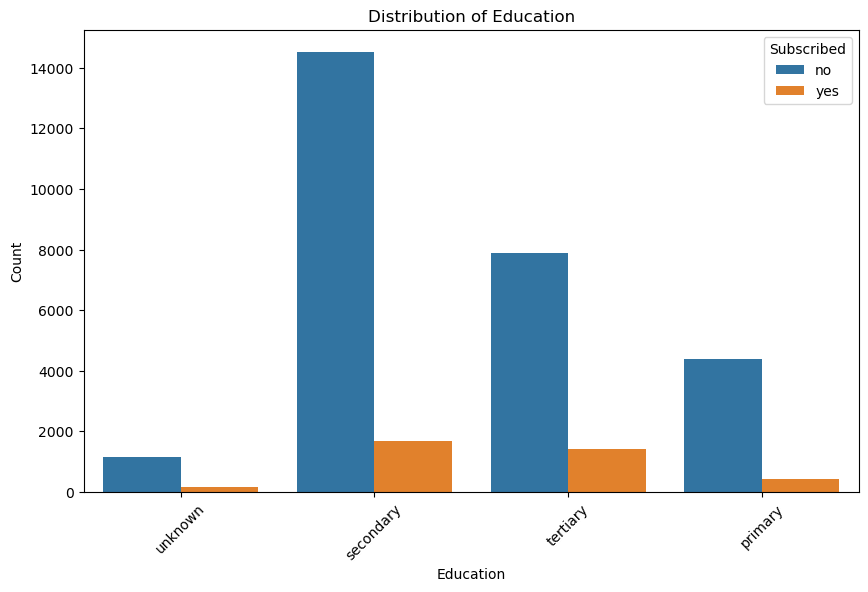

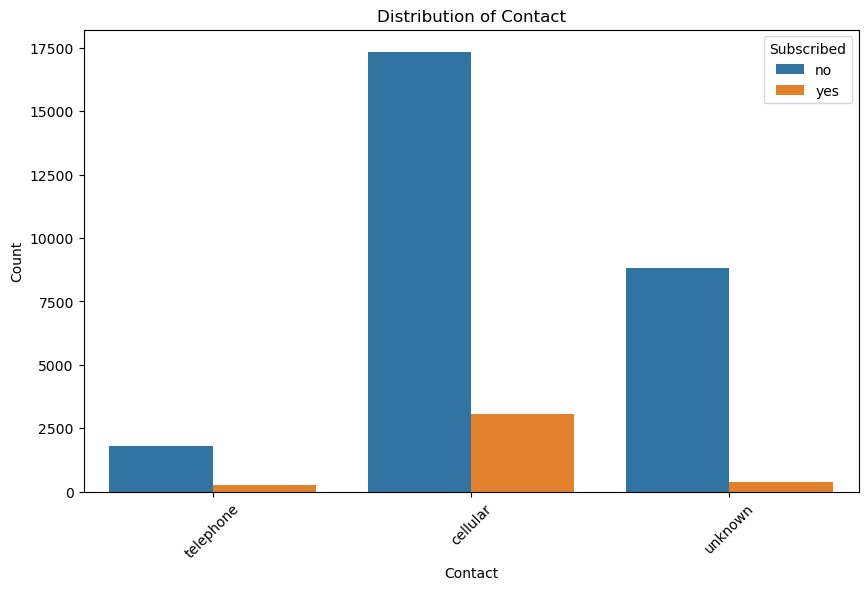

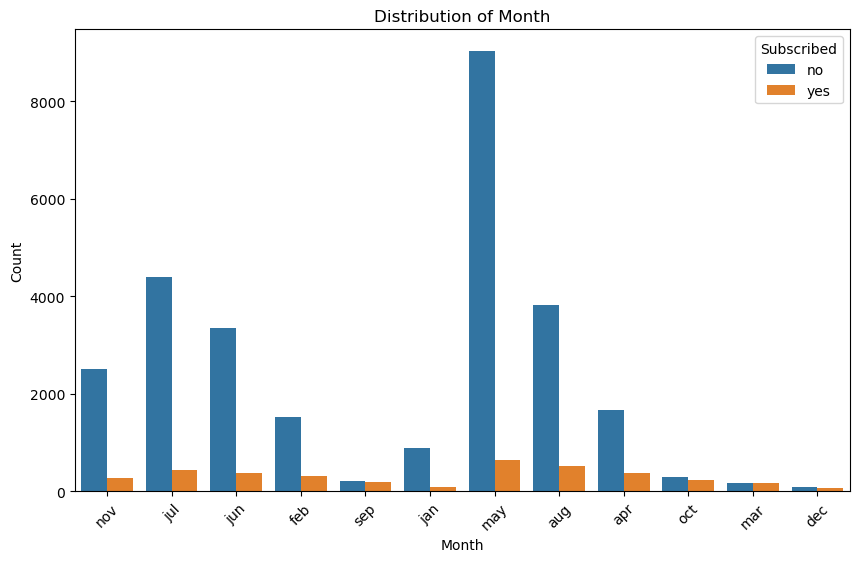

/var/folders/v2/lw6f6b7d16q2_yf4k_8hbpch0000gn/T/ipykernel_54116/1563464339.py:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


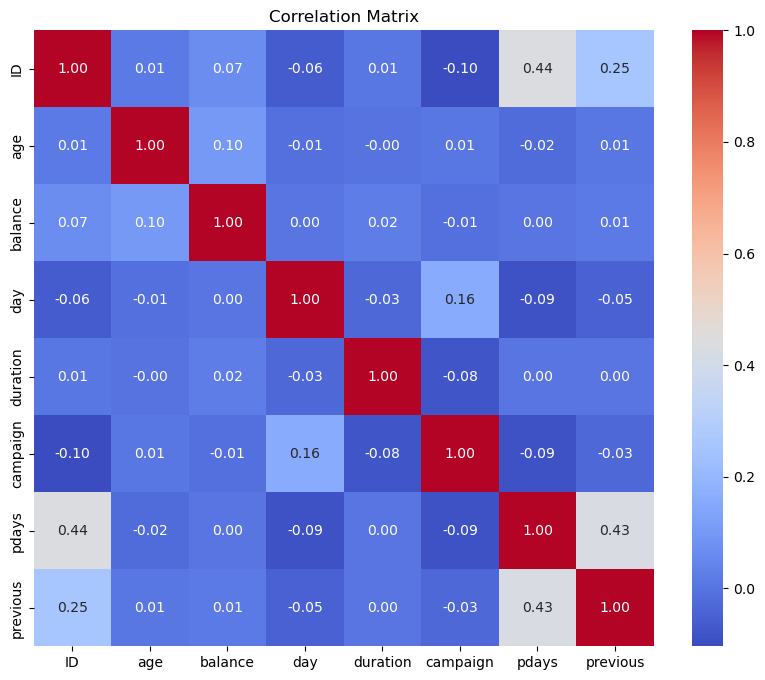

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load train dataset
train_data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

# Display first rows 
print(train_data.head())

# Display  info
print(train_data.info())

# missing values
print(train_data.isnull().sum())

print(train_data.describe())

# Visualize the distribution of the target variable 'subscribed'
plt.figure(figsize=(8, 6))
sns.countplot(x='subscribed', data=train_data)
plt.title('Distribution of Subscriptions')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of categorical variables
cat_cols = ['job', 'marital', 'education', 'contact', 'month']
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='subscribed', data=train_data)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Subscribed', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the train dataset
train_data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

# Drop irrelevant columns or columns with too many unique values
train_data.drop(['duration', 'contact', 'day', 'month', 'pdays'], axis=1, inplace=True)

# Handle categorical variables using label encoding
label_encoder = LabelEncoder()
train_data['job'] = label_encoder.fit_transform(train_data['job'])
train_data['marital'] = label_encoder.fit_transform(train_data['marital'])
train_data['education'] = label_encoder.fit_transform(train_data['education'])
train_data['default'] = label_encoder.fit_transform(train_data['default'])
train_data['housing'] = label_encoder.fit_transform(train_data['housing'])
train_data['loan'] = label_encoder.fit_transform(train_data['loan'])
train_data['subscribed'] = label_encoder.fit_transform(train_data['subscribed'])

# Normalize numerical variables using StandardScaler
scaler = StandardScaler()
train_data[['age', 'balance', 'campaign', 'previous']] = scaler.fit_transform(
    train_data[['age', 'balance', 'campaign', 'previous']])

# Create new features if necessary
train_data['age_balance_ratio'] = train_data['age'] / (train_data['balance'] + 1)
train_data['campaign_previous_ratio'] = train_data['campaign'] / (train_data['previous'] + 1)

# Split the data into features and target variable
X = train_data.drop('subscribed', axis=1)
y = train_data['subscribed']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the preprocessed data to a new CSV file if needed
# train_data.to_csv('preprocessed_train.csv', index=False)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = best_rf_classifier.predict(X_val)

# Evaluate model performance
print("Best Hyperparameters:", best_params)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'other'

--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sherya/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'unknown'


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the validation set
y_pred_val = best_rf_classifier.predict(X_val)

# Evaluate model performance on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

# Make predictions on the test set
y_pred_test = best_rf_classifier.predict(X_test)

# Evaluate model performance on the test set (if true labels are available)
# Assuming you have the true labels for the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Save the predictions to a CSV file (if needed)
# test_data['predicted_subscribed'] = y_pred_test
# test_data.to_csv('test_predictions.csv', index=False)


NameError: name 'best_rf_classifier' is not defined

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the validation set
y_pred_val = best_rf_classifier.predict(X_val)

# Evaluate model performance on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

# Make predictions on the test set
y_pred_test = best_rf_classifier.predict(X_test)


print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))



NameError: name 'best_rf_classifier' is not defined